In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('../Datasets/airline_tweets.csv')

In [19]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

<AxesSubplot:xlabel='airline', ylabel='count'>

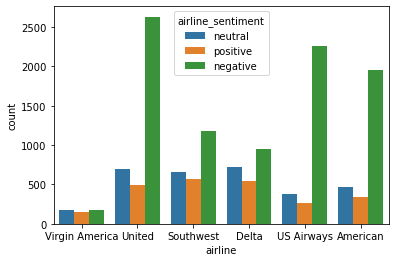

In [6]:
sns.countplot(data=df,x='airline',hue='airline_sentiment')

<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

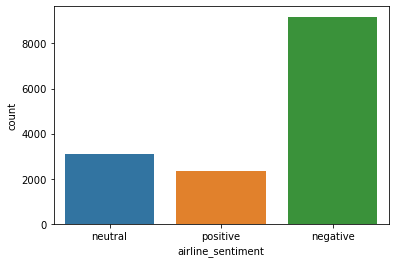

In [7]:
sns.countplot(data=df,x='airline_sentiment')

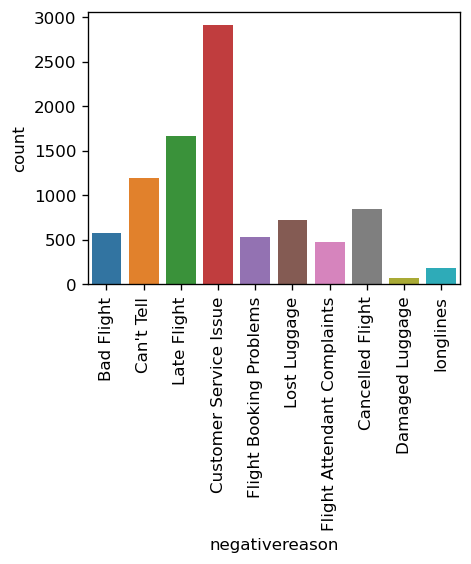

In [10]:
plt.figure(figsize=(4,3),dpi=120)
sns.countplot(data=df,x='negativereason')
plt.xticks(rotation=90)
plt.show()

In [21]:
data = df[['airline_sentiment','text']]

In [22]:
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14640 non-null  object
 1   text               14640 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB


## #train-test-split

In [25]:
from sklearn.model_selection import train_test_split

In [28]:
X = data['text']
y = data['airline_sentiment']

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=101,test_size=0.33)

# # TfidfVectorizer

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
tfidv = TfidfVectorizer(stop_words='english')

In [36]:
tfidv.fit(X_train)

TfidfVectorizer(stop_words='english')

In [38]:
X_train_tfidv = tfidv.transform(X_train)
X_test_tfidv = tfidv.transform(X_test)

In [39]:
X_train_tfidv

<9808x11702 sparse matrix of type '<class 'numpy.float64'>'
	with 89584 stored elements in Compressed Sparse Row format>

#  Model Comparisons - Naive Bayes,LogisticRegression, LinearSVC,Decision-Tree

In [42]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidv,y_train)

MultinomialNB()

 # #LinearSVC

In [43]:
from sklearn.svm import LinearSVC,SVC

In [45]:
lin_svc = LinearSVC()
lin_svc.fit(X_train_tfidv,y_train)

LinearSVC()

In [46]:
svc = SVC()
svc.fit(X_train_tfidv,y_train)

SVC()

In [49]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_tfidv,y_train)

LogisticRegression(max_iter=1000)

In [62]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_tfidv,y_train)

DecisionTreeClassifier()

In [64]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
randm_forest = RandomForestClassifier()
randm_forest.fit(X_train_tfidv,y_train)

RandomForestClassifier()

## Model Evaluation

In [50]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [55]:
def model_result(model):
    prediction = model.predict(X_test_tfidv)
    print(classification_report(y_test,prediction))
    plot_confusion_matrix(model,X_test_tfidv,y_test)

              precision    recall  f1-score   support

    negative       0.66      0.99      0.80      3009
     neutral       0.76      0.14      0.24      1032
    positive       0.91      0.15      0.26       791

    accuracy                           0.67      4832
   macro avg       0.78      0.43      0.43      4832
weighted avg       0.72      0.67      0.59      4832



C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


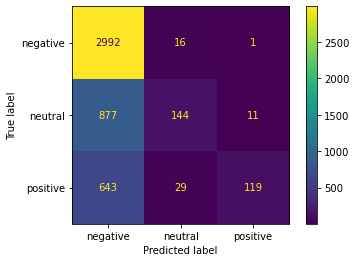

In [57]:
#Naive-Bayes-Binomial
model_result(nb)

              precision    recall  f1-score   support

    negative       0.82      0.90      0.86      3009
     neutral       0.61      0.50      0.55      1032
    positive       0.75      0.64      0.69       791

    accuracy                           0.77      4832
   macro avg       0.73      0.68      0.70      4832
weighted avg       0.76      0.77      0.77      4832



C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


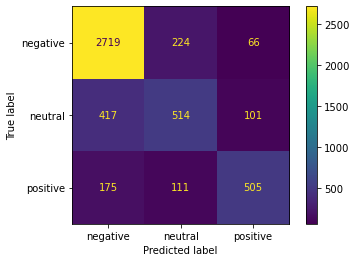

In [58]:
#LinearSVC
model_result(lin_svc)

              precision    recall  f1-score   support

    negative       0.77      0.95      0.85      3009
     neutral       0.69      0.38      0.49      1032
    positive       0.80      0.56      0.66       791

    accuracy                           0.77      4832
   macro avg       0.75      0.63      0.67      4832
weighted avg       0.76      0.77      0.74      4832



C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


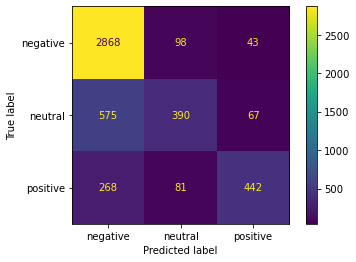

In [59]:
#SVC
model_result(svc)

              precision    recall  f1-score   support

    negative       0.79      0.93      0.86      3009
     neutral       0.63      0.45      0.52      1032
    positive       0.81      0.57      0.67       791

    accuracy                           0.77      4832
   macro avg       0.75      0.65      0.68      4832
weighted avg       0.76      0.77      0.75      4832



C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


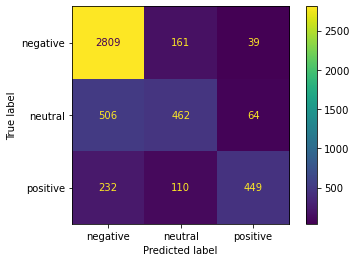

In [60]:
#logesticRegression
model_result(log_reg)

              precision    recall  f1-score   support

    negative       0.77      0.79      0.78      3009
     neutral       0.41      0.41      0.41      1032
    positive       0.59      0.54      0.56       791

    accuracy                           0.67      4832
   macro avg       0.59      0.58      0.58      4832
weighted avg       0.66      0.67      0.66      4832



C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


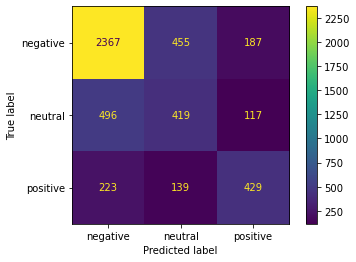

In [63]:
#DecisionTreeClassifier
model_result(tree_model)

              precision    recall  f1-score   support

    negative       0.77      0.94      0.85      3009
     neutral       0.63      0.37      0.46      1032
    positive       0.76      0.54      0.63       791

    accuracy                           0.75      4832
   macro avg       0.72      0.62      0.65      4832
weighted avg       0.74      0.75      0.73      4832



C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


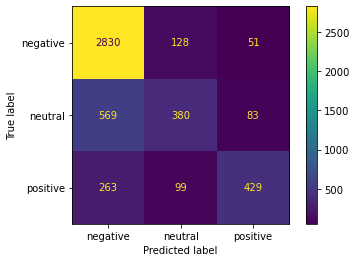

In [65]:
#RandomForestClassifier
model_result(randm_forest)

### Finalizing a PipeLine for Deployment on  New Tweets

If we were satisfied with a model's performance, we should set up a pipeline that can take in a tweet directly.

In [67]:
# Pipeline for LinearSVC
from sklearn.pipeline import Pipeline

In [68]:
pipe = Pipeline([('tfidf',TfidfVectorizer()),('svc',LinearSVC())])

In [69]:
pipe.fit(data['text'],data['airline_sentiment'])

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [73]:
pipe.predict(['ok airlins'])

array(['neutral'], dtype=object)

In [75]:
# Pipeline for DecisionTree
from sklearn.pipeline import Pipeline
pipe = Pipeline([('tfidf',TfidfVectorizer()),('tree',DecisionTreeClassifier())])
pipe.fit(data['text'],data['airline_sentiment'])

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('tree', DecisionTreeClassifier())])

In [88]:
pipe.predict(['great'])

array(['positive'], dtype=object)